# Loan Defaulter EDA and Prediction

##### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing data and viewing information

In [2]:
#import data as dataframe
df = pd.read_csv("C:/Users/Padmashree/Documents/DADS/Data science/Final project/Loan_default.csv")

In [3]:
#set loan id as the column index
df.set_index('LoanID', inplace=True)

In [4]:
# first 5 rows
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
LoanID,,,,,,,,,,,,,,,,,
I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
# last 5 rows
df.tail()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
LoanID,,,,,,,,,,,,,,,,,
8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [6]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes:

In [7]:
# descriptive statistics
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [8]:
# no of rows and columns/dimesnsions
df.shape

(255347, 17)

In [9]:
#Check for null values
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
#Check for duplicated values
df[df.duplicated()].sum()

Age                 0
Income              0
LoanAmount          0
CreditScore         0
MonthsEmployed      0
NumCreditLines      0
InterestRate      0.0
LoanTerm            0
DTIRatio          0.0
Education           0
EmploymentType      0
MaritalStatus       0
HasMortgage         0
HasDependents       0
LoanPurpose         0
HasCoSigner         0
Default             0
dtype: object

In [11]:
# Splitting the columns into 2 arrays - categorical and numerical
categorical_columns = ["Education", "EmploymentType", "MaritalStatus", "HasMortgage", "HasDependents",
                       "LoanPurpose", "HasCoSigner", "Default"]
numerical_columns = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines",
                    "InterestRate", "LoanTerm", "DTIRatio"]

### Visualization

#### Pie chart

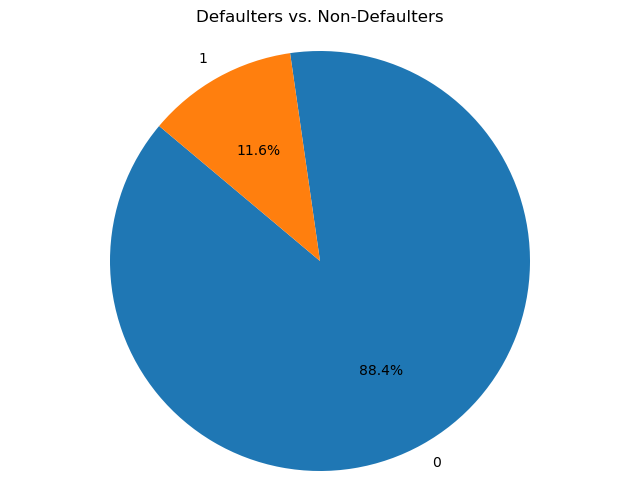

In [12]:
default_counts = df['Default'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Defaulters vs. Non-Defaulters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Boxplots

Text(0.5, 1.0, 'Boxplot of Default by age')

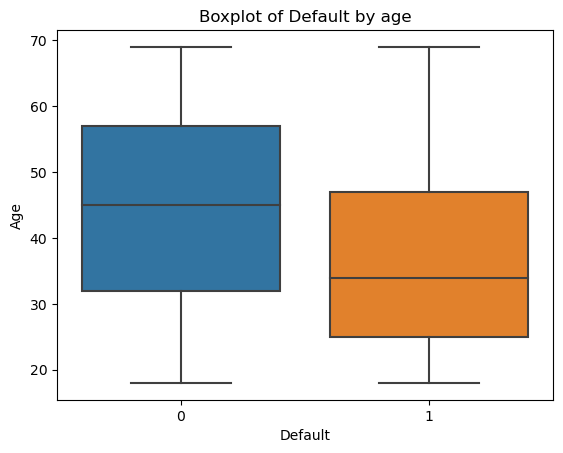

In [13]:
sns.boxplot(x="Default", 
            y="Age", 
            data = df)
plt.title(f'Boxplot of Default by age')

Text(0.5, 1.0, 'Boxplot of Default by Income')

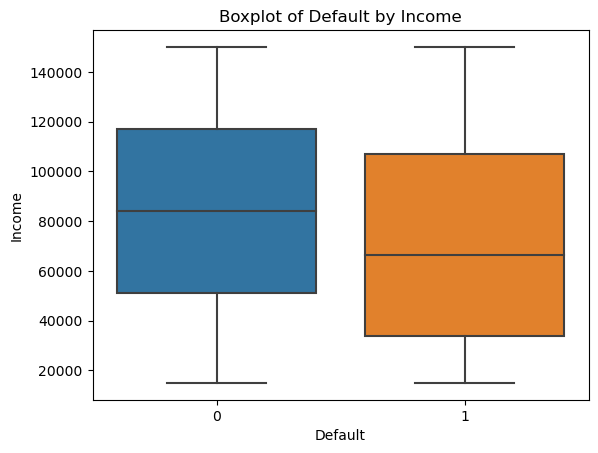

In [14]:
sns.boxplot(x="Default", 
            y="Income", 
            data = df)
plt.title(f'Boxplot of Default by Income')

Text(0.5, 1.0, 'Boxplot of Default by CreditScore')

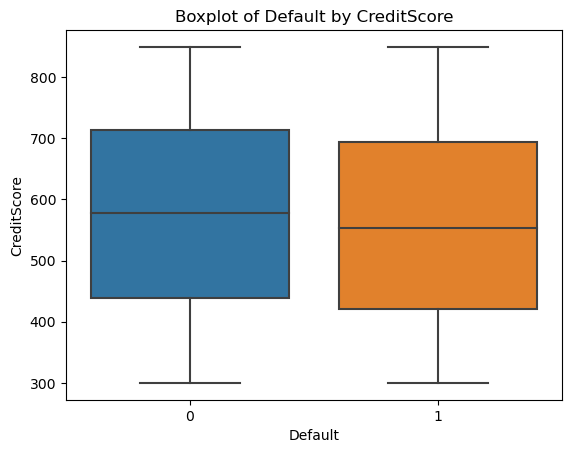

In [15]:
sns.boxplot(x="Default", 
            y="CreditScore", 
            data = df)
plt.title(f'Boxplot of Default by CreditScore')

Text(0.5, 1.0, 'Boxplot of Default by MonthsEmployed')

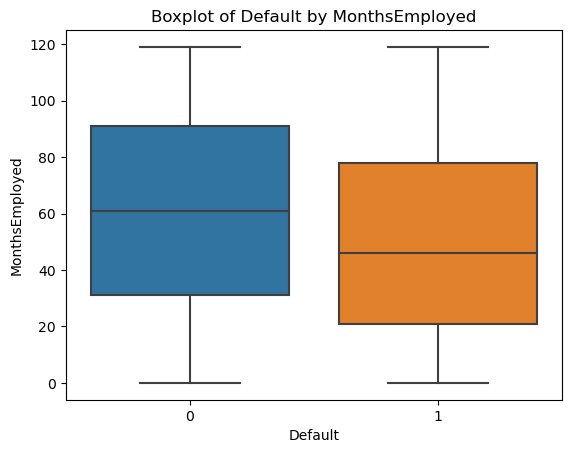

In [16]:
sns.boxplot(x="Default", 
            y="MonthsEmployed", 
            data = df)
plt.title(f'Boxplot of Default by MonthsEmployed')

Text(0.5, 1.0, 'Boxplot of Default by InterestRate')

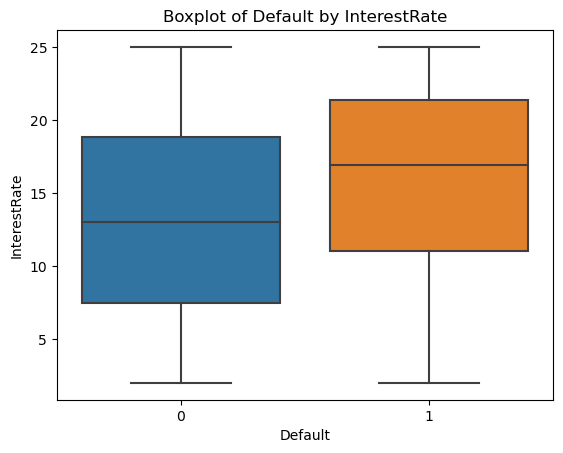

In [17]:
sns.boxplot(x="Default", 
            y="InterestRate", 
            data = df)
plt.title(f'Boxplot of Default by InterestRate')

Text(0.5, 1.0, 'Boxplot of Default by LoanTerm')

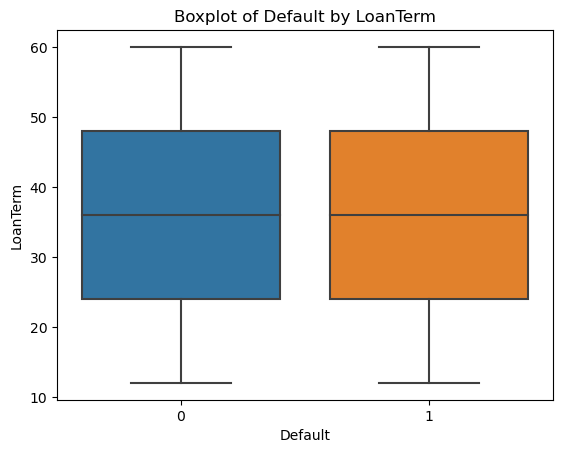

In [18]:
sns.boxplot(x="Default", 
            y="LoanTerm", 
            data = df)
plt.title(f'Boxplot of Default by LoanTerm')

Text(0.5, 1.0, 'Boxplot of Default by DTIRatio')

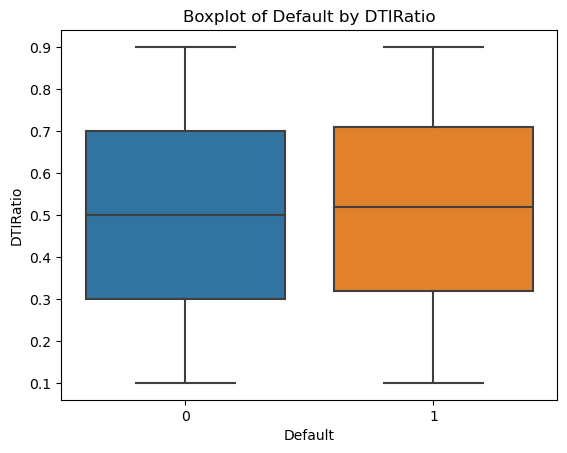

In [19]:
sns.boxplot(x="Default", 
            y="DTIRatio", 
            data = df)
plt.title(f'Boxplot of Default by DTIRatio')

#### Histogram

Text(0.5, 1.0, 'Histogram of Age by Default')

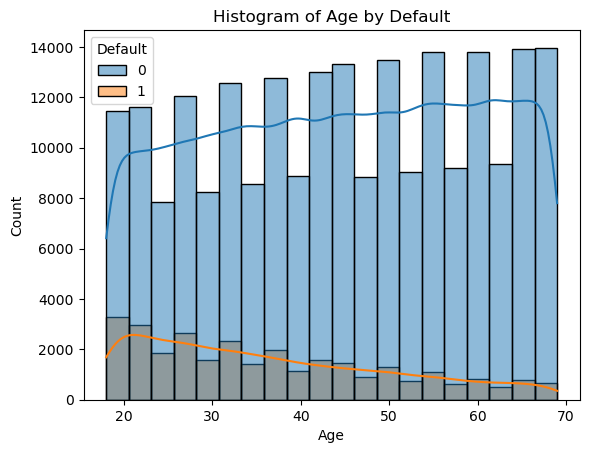

In [20]:
sns.histplot(df, x='Age', hue='Default', bins=20, kde=True)
plt.title(f'Histogram of Age by Default')

Text(0.5, 1.0, 'Histogram of LoanAmount by Default')

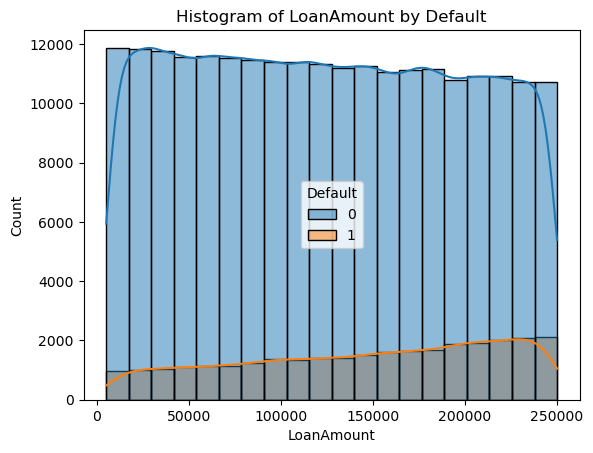

In [21]:
sns.histplot(df, x='LoanAmount', hue='Default', bins=20, kde=True)
plt.title(f'Histogram of LoanAmount by Default')

Text(0.5, 1.0, 'Histogram of CreditScore by Default')

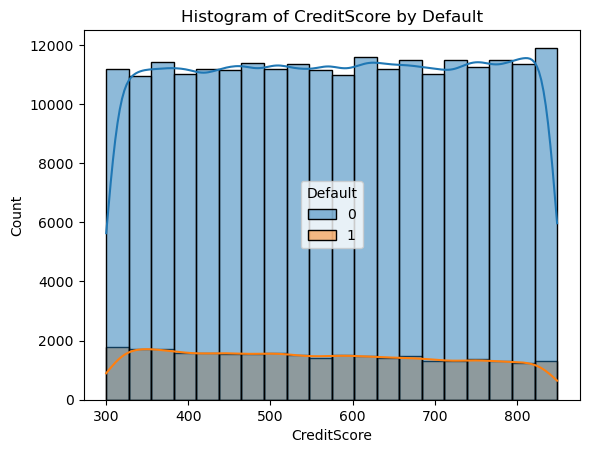

In [22]:
sns.histplot(df, x='CreditScore', hue='Default', bins=20, kde=True)
plt.title(f'Histogram of CreditScore by Default')

Text(0.5, 1.0, 'Histogram of MonthsEmployed by Default')

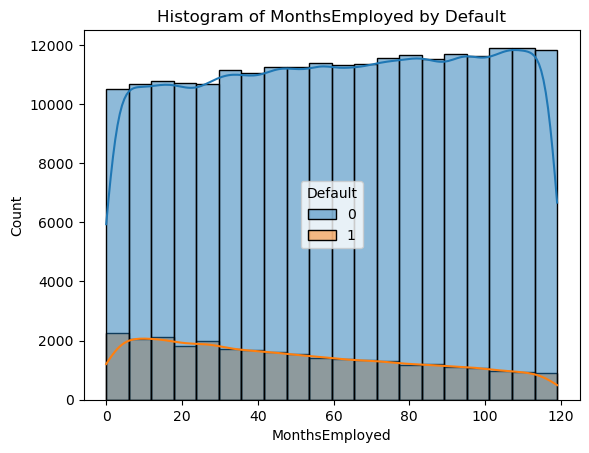

In [23]:
sns.histplot(df, x='MonthsEmployed', hue='Default', bins=20, kde=True)
plt.title(f'Histogram of MonthsEmployed by Default')

Text(0.5, 1.0, 'Histogram of InterestRate by Default')

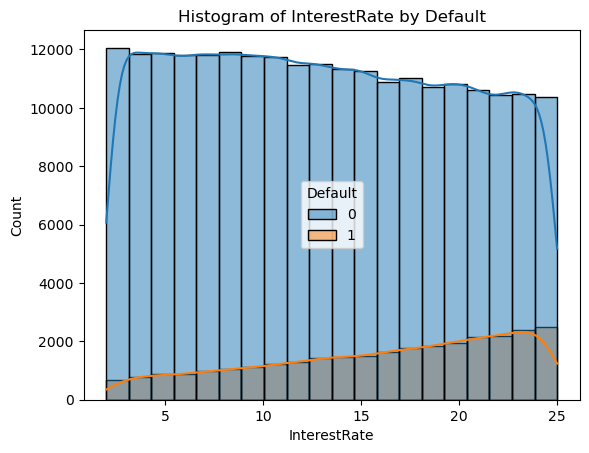

In [24]:
sns.histplot(df, x='InterestRate', hue='Default', bins=20, kde=True)
plt.title(f'Histogram of InterestRate by Default')

Text(0.5, 1.0, 'Histogram of LoanTerm by Default')

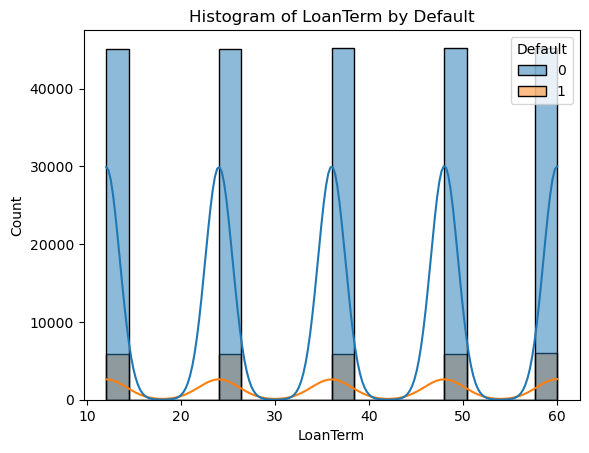

In [25]:
sns.histplot(df, x='LoanTerm', hue='Default', bins=20, kde=True)
plt.title(f'Histogram of LoanTerm by Default')

Text(0.5, 1.0, 'Histogram of DTIRatio by Default')

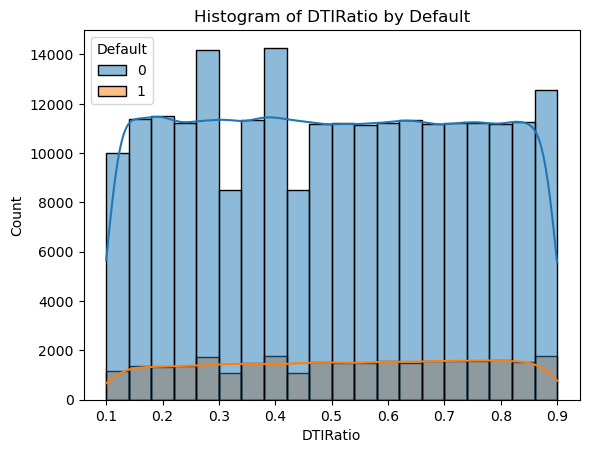

In [26]:
sns.histplot(df, x='DTIRatio', hue='Default', bins=20, kde=True)
plt.title(f'Histogram of DTIRatio by Default')

#### Countplots to find the ratio of people who paid the loan and defaulters

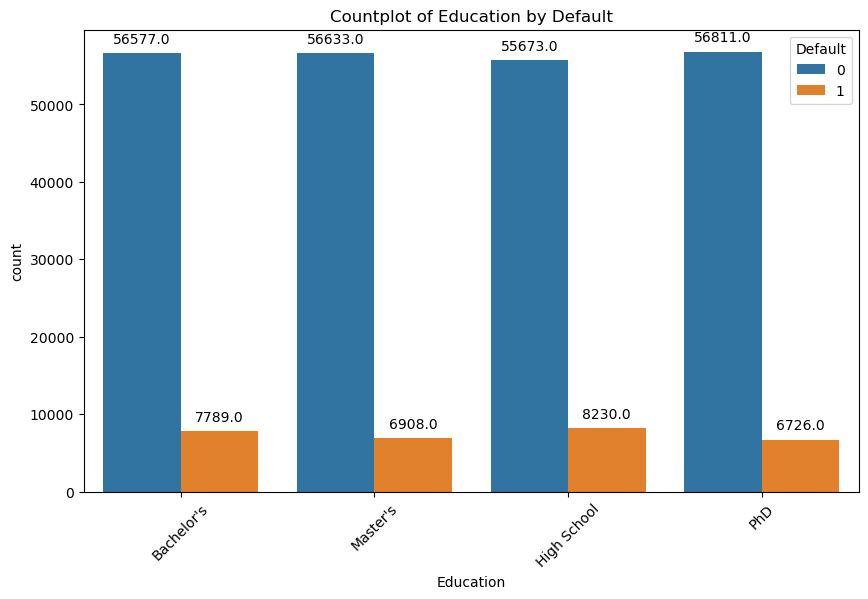

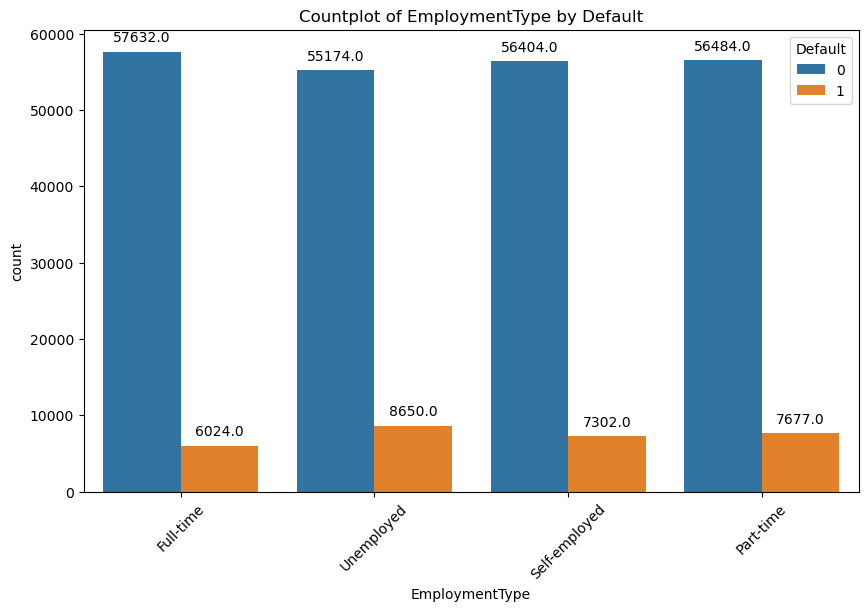

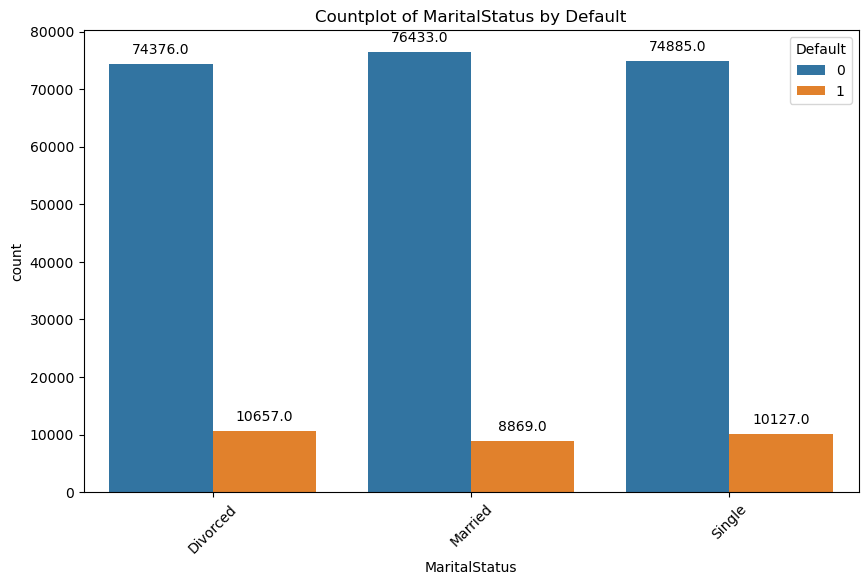

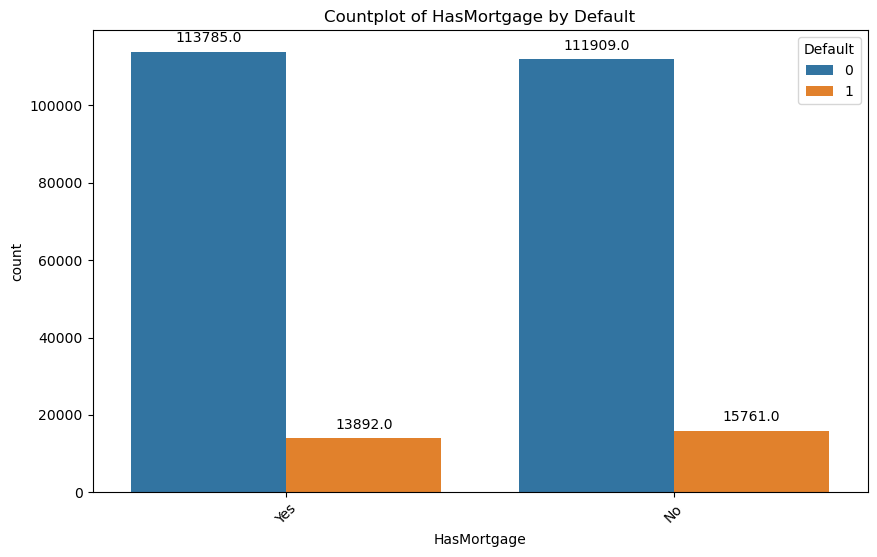

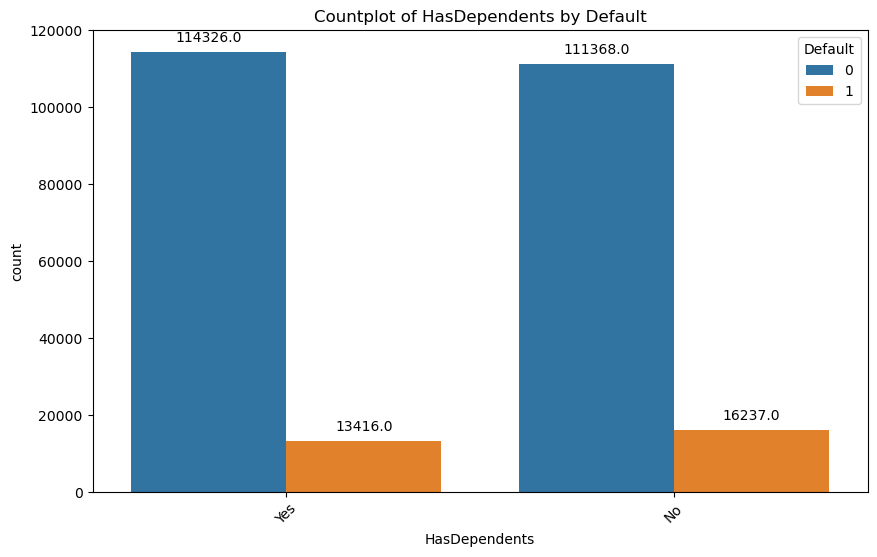

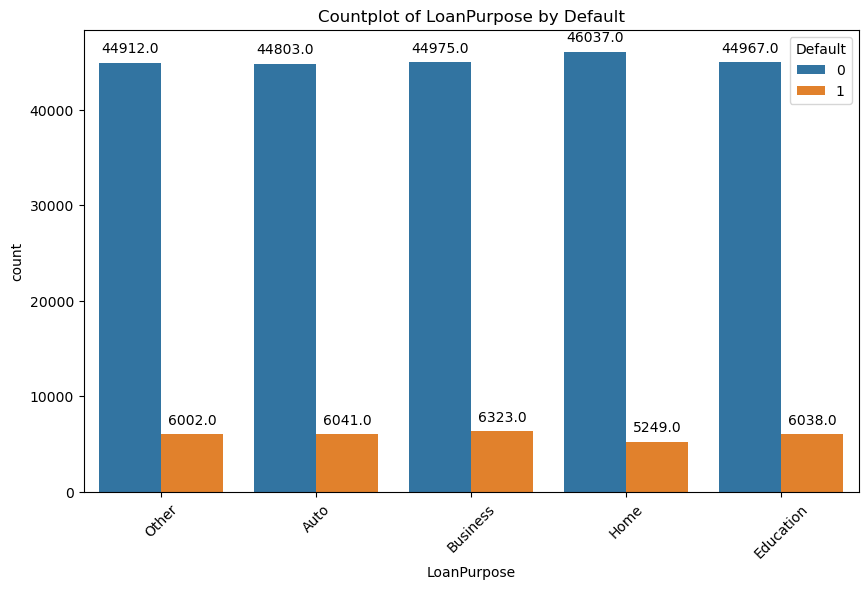

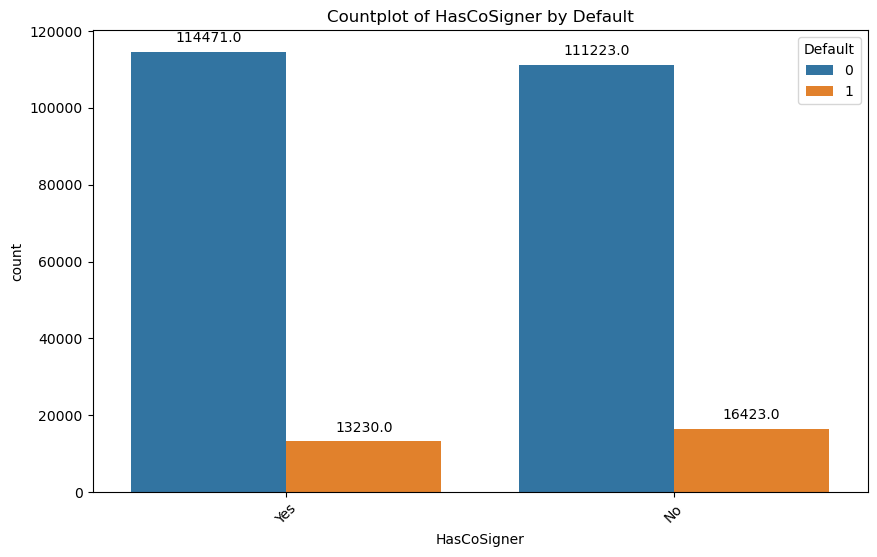

In [27]:
for cat_col in categorical_columns[:-1]:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=cat_col, data=df, hue='Default')
    counts = df[cat_col].value_counts()
    plt.title(f'Countplot of {cat_col} by Default')
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

#### Correlation matrix

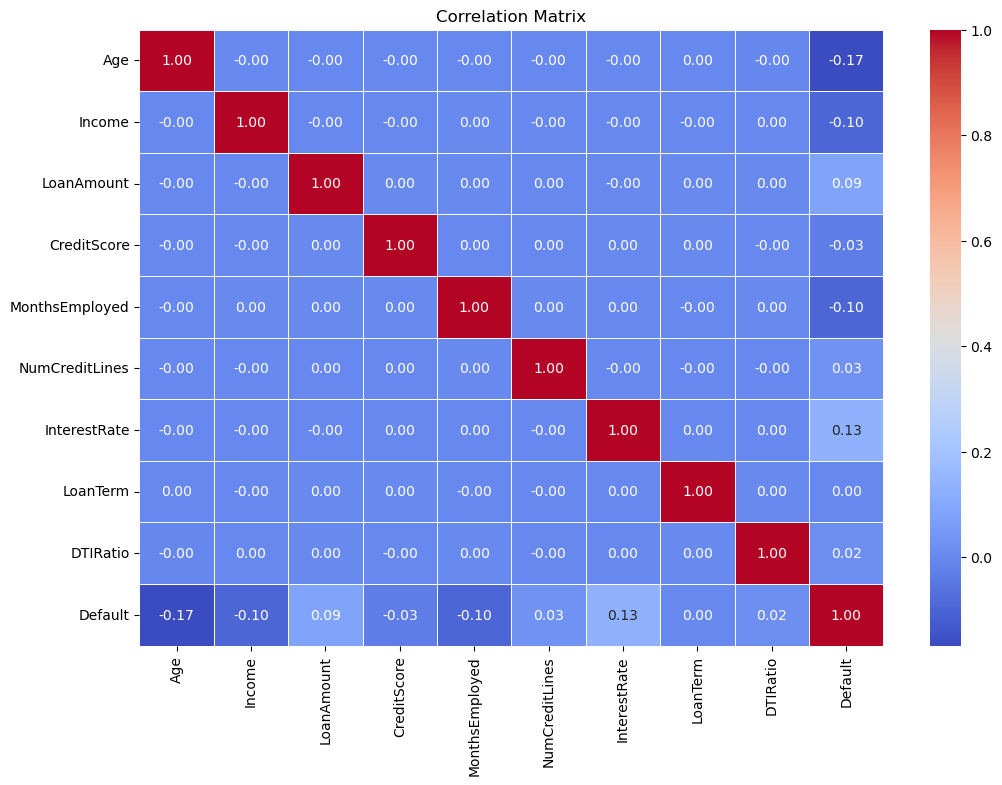

In [28]:
# Select only numeric columns for correlation matrix calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

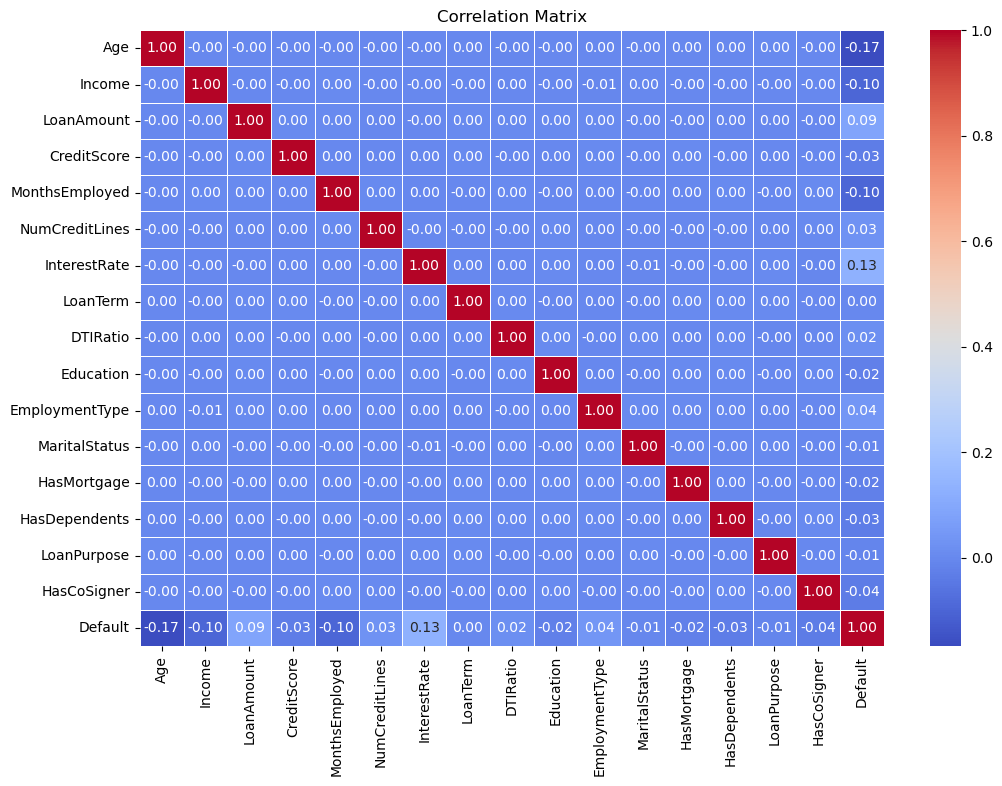

In [29]:
# Label encoding to convert categorical to numerical variables
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
obj_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in obj_col:
    df[col] = le.fit_transform(df[col])
    
# Select only numeric columns for correlation matrix calculation
#numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Feature engineering

In [30]:
selected_variables = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'Default']
df_selected = df[selected_variables]

In [ ]:
# Label encoding for categorical variables
le = LabelEncoder()
obj_col = ['LoanPurpose']
for col in obj_col:
    df_selected[col] = le.fit_transform(df_selected[col])

In [31]:
df_selected.dtypes

Age               int64
Income            int64
LoanAmount        int64
CreditScore       int64
MonthsEmployed    int64
Default           int64
dtype: object

In [32]:
majority_class = df_selected[df_selected['Default'] == 0]
minority_class = df_selected[df_selected['Default'] == 1]


In [33]:
minority_count = len(minority_class)
minority_count

29653

In [34]:
# Randomly select a subset of instances from the majority class
majority_subset = majority_class.sample(n=minority_count, random_state=42)

In [35]:
# Combine minority class with the subset of majority class
balanced_df = pd.concat([minority_class, majority_subset])

In [36]:
# Shuffle the dataframe to mix minority and majority class instances
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

#### Splitting into train and test sets

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X=balanced_df.drop('Default', axis=1)
y=balanced_df.Default

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Scaling

In [40]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

## Model building

#### Logistic regression

In [41]:
# Logistic Regression model without tuning
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
# fitting the model
Logreg.fit(X_train, y_train)
# Predicting the test data
y_pred = Logreg.predict(X_test)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.6508543165467626
CONFUSION MATRIX: [[5740 3145]
 [3067 5840]]
F1: 0.6528057232282585


C:\Users\Padmashree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# Logistic Regression with hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {'penalty': ['l1'],
'C': [0.1, 1, 10],
'solver': ['liblinear'],
'class_weight': ['balanced']}
grid_search = GridSearchCV(LogisticRegression(), params, cv=5)
#fitting the tuned model
grid_search.fit(X_train_std, y_train)
# Predict the target variable for the test set of tuned model
y_pred = grid_search.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.650685701438849
CONFUSION MATRIX: [[5724 3161]
 [3054 5853]]
F1: 0.6532001562412811


#### Decision tree

In [43]:
# Decision Tree Classifier without tuning
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
# fitting the model
dectree.fit(X_train_std, y_train)
# Predicting the test data
y_pred = dectree.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.5721110611510791
CONFUSION MATRIX: [[5060 3825]
 [3788 5119]]
F1: 0.5735252927006891


In [44]:
#Decision Tree classifier with tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini'],
'max_depth': [20],
'min_samples_split': [ 5],
'min_samples_leaf': [2],
'max_features': [ 'sqrt']}
grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
#fitting the tuned model
grid_search.fit(X_train_std, y_train)
# Predict the target variable for the test set of tuned model
y_pred = grid_search.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.5832958633093526
CONFUSION MATRIX: [[5552 3333]
 [4081 4826]]
F1: 0.5655689675377944


#### Random forest

In [45]:
# Random Forest Classifier without tuning
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
# fitting the model
ranfor.fit(X_train_std, y_train)
# Predicting the test data
y_pred = ranfor.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.635847571942446
CONFUSION MATRIX: [[5766 3119]
 [3360 5547]]
F1: 0.6313093950947476


In [46]:
#Random Forest classifier with tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [50, 100, 200],
'criterion': ['gini', 'entropy'],
'max_depth': [5, 10, 20, 50],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['auto', 'sqrt', 'log2']}
random_search = RandomizedSearchCV(ranfor, params, cv=5, n_iter=10, random_state=42)

#fitting the tuned model
random_search.fit(X_train_std, y_train)


C:\Users\Padmashree\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Padmashree\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Padmashree\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Padmashree\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Padmashree\ana

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [47]:
#viewing best parameter in grid search
best_params = random_search.best_params_
print(best_params)
# Predict the target variable for the test set of tuned model
y_pred = random_search.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
Accuracy: 0.6549572841726619
CONFUSION MATRIX: [[5808 3077]
 [3062 5845]]
F1: 0.6556733411857086


#### XGBoost

In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
# XGBoost Classifier model without tuning

import xgboost as xgb
xg = xgb.XGBClassifier()
# fitting the model
xg.fit(X_train_std, y_train)
# Predicting the test data
y_pred = xg.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.6487747302158273
CONFUSION MATRIX: [[5798 3087]
 [3162 5745]]
F1: 0.6477253509216979


In [50]:
# XGBoost Classifier model with tuning
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 0.5],
'max_depth': [5, 10, 20],
'subsample': [0.5, 0.7, 1],
'colsample_bytree': [0.5, 0.7, 1],
'gamma': [0, 0.1, 0.5],
'reg_alpha': [0, 0.1, 1],
'reg_lambda': [0, 0.1, 1],
'min_child_weight': [1, 5, 10]}
random_search = RandomizedSearchCV(xg, params, cv=5, n_iter=10, random_state=42)
#fitting the tuned model
random_search.fit(X_train_std, y_train)
#viewing best parameter in grid search
best_params = random_search.best_params_
print(best_params)
# Predict the target variable for the test set of tuned model
y_pred = random_search.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

{'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}
Accuracy: 0.6565872302158273
CONFUSION MATRIX: [[5821 3064]
 [3046 5861]]
F1: 0.6573575594436967


#### K Nearest neighbours

The optimal k value is: 30


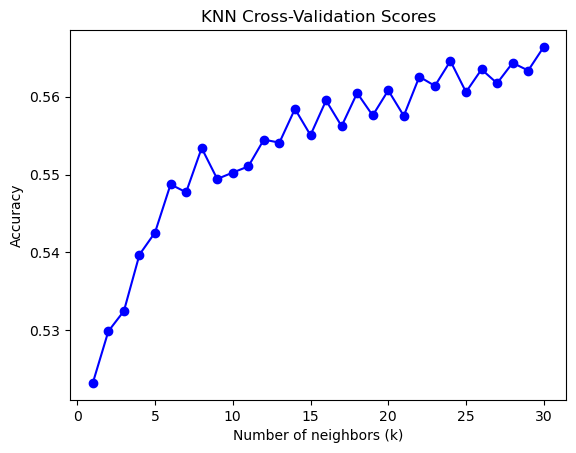

In [51]:
# Finding best value of k 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_values = list(range(1, 31))
cv_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("The optimal k value is:", optimal_k)
# plotting the values
plt.plot(k_values, cv_scores, 'bo-')
plt.title('KNN Cross-Validation Scores')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [52]:
# KNN Classifier model without tuning
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
# fitting the model
knn.fit(X_train_std, y_train)
# Predicting the test data
y_pred = knn.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.640119154676259
CONFUSION MATRIX: [[5904 2981]
 [3422 5485]]
F1: 0.6314395901686525


In [53]:
# KNN Classifier model with tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors': [3, 5, 7, 9],
'weights': ['uniform', 'distance'],
'p': [1, 2, 3]}
random_search = RandomizedSearchCV(knn, params, cv=5, n_iter=10, random_state=42)
#fitting the tuned model
random_search.fit(X_train_std, y_train)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30),
                   param_distributions={'n_neighbors': [3, 5, 7, 9],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [54]:
#viewing best parameter in grid search
best_params = random_search.best_params_
print(best_params)
# Predict the target variable for the test set of tuned model
y_pred = random_search.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

{'weights': 'uniform', 'p': 1, 'n_neighbors': 9}
Accuracy: 0.6280912769784173
CONFUSION MATRIX: [[5612 3273]
 [3344 5563]]
F1: 0.6270641943301584


#### Support vector Machine

In [55]:
# SVM Classifier model without tuning - nw
from sklearn.svm import SVC
svm = SVC()
# fitting the model
svm.fit(X_train_std, y_train)
# Predicting the test data
y_pred = svm.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)


Accuracy: 0.6579361510791367
CONFUSION MATRIX: [[5755 3130]
 [2956 5951]]
F1: 0.6616633311096286


#### Naive Bayes

In [56]:
# Naive Bayes model without tuning
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
# fitting the model
nb.fit(X_train_std, y_train)
# Predicting the test data
y_pred = nb.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.6498426258992805
CONFUSION MATRIX: [[5625 3260]
 [2970 5937]]
F1: 0.6558771542200619


In [57]:
# Naive Bayes model with tuning
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [58]:
from sklearn.naive_bayes import MultinomialNB
params = {'alpha': [0.1, 0.5, 1, 5, 10],
'fit_prior': [True],
'class_prior': [None]}
grid_search = GridSearchCV(MultinomialNB(), params, cv=5)
#fitting the tuned model
grid_search.fit(X_train_scaled, y_train)
# Predict the target variable for the test set of tuned model
y_pred = grid_search.predict(X_test_std)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("CONFUSION MATRIX:", confusion_matrix)
print("F1:", f1)

Accuracy: 0.6224145683453237
CONFUSION MATRIX: [[5534 3351]
 [3367 5540]]
F1: 0.6225418586358018


# Streamlit

In [59]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [61]:
import streamlit as st
import joblib

In [63]:
# Save the trained model as a pickle file
joblib.dump(Logreg, 'logreg_model.pkl')

['logreg_model.pkl']

In [64]:
# Load the saved model
model = joblib.load('logreg_model.pkl')

In [ ]:
streamlit run "C:\Users\Padmashree\Documents\DADS\Data science\Final project\Loan_default_prediction_app.py"